In [1]:
#packages
from sqlalchemy import create_engine
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Postgres username, password, and database name
POSTGRES_ADDRESS = 'lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com' 
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'lhl_student' 
POSTGRES_PASSWORD = 'lhl_student' 
POSTGRES_DBNAME = 'mid_term_project' 


In [3]:
#login
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
    .format(username=POSTGRES_USERNAME,
    password=POSTGRES_PASSWORD,
    ipaddress=POSTGRES_ADDRESS,
    port=POSTGRES_PORT,
    dbname=POSTGRES_DBNAME))


In [4]:
# Create the connection
cnx = create_engine(postgres_str)

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
#A very small sample of all the columns
flightscol = pd.read_sql_query('''SELECT *
       FROM flights LIMIT 5;''', cnx)

In [7]:
flightscol

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-04-15,AA,AA,AA,118,AA,N105NN,118,12892,LAX,"Los Angeles, CA",12478,JFK,"New York, NY",700,706.0,6.0,15.0,721.0,1532.0,10.0,1532,1542.0,10.0,0.0,None,0.0,N,332.0,336.0,311.0,1.0,2475.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2018-04-15,AA,AA,AA,119,AA,N752AN,119,11298,DFW,"Dallas/Fort Worth, TX",13830,OGG,"Kahului, HI",1105,1102.0,-3.0,14.0,1116.0,1406.0,5.0,1421,1411.0,-10.0,0.0,None,0.0,N,496.0,489.0,470.0,1.0,3711.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2,2018-04-15,AA,AA,AA,122,AA,N157AA,122,11298,DFW,"Dallas/Fort Worth, TX",14771,SFO,"San Francisco, CA",2045,2106.0,21.0,34.0,2140.0,2315.0,4.0,2241,2319.0,38.0,0.0,None,0.0,N,236.0,253.0,215.0,1.0,1464.0,21.0,0.0,17.0,0.0,0.0,None,None,None,None
3,2018-04-15,AA,AA,AA,123,AA,N772AN,123,11298,DFW,"Dallas/Fort Worth, TX",12173,HNL,"Honolulu, HI",915,2040.0,685.0,27.0,2107.0,16.0,6.0,1245,22.0,697.0,0.0,None,0.0,N,510.0,522.0,489.0,1.0,3784.0,0.0,0.0,12.0,0.0,685.0,None,None,None,None
4,2018-04-15,AA,AA,AA,129,AA,N964TW,129,11298,DFW,"Dallas/Fort Worth, TX",15016,STL,"St. Louis, MO",905,900.0,-5.0,13.0,913.0,1034.0,4.0,1052,1038.0,-14.0,0.0,None,0.0,N,107.0,98.0,81.0,1.0,550.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None


##### Initial columns to pull
##### columns to pull
fl_date,
mkt_unique_carrier,
mkt_carrier_fl_num,
tail_num,
origin_airport_id,
origin_city_name,
dest_airport_id,
dest_city_name,
crs_dep_time,
dep_delay,
taxi_out,
taxi_in,
crs_arr_time,
arr_delay,
cancelled,
cancellation_code,
diverted,
crs_elapsed_time,
actual_elapsed_time,
air_time,
distance,
carrier_delay,
weather_delay,
nas_delay,
security_delay,
late_aircraft_delay,
first_dep_time,
total_add_gtime,
longest_add_gtime,

##### columns that are redundant
mkt_unique_carrier = branded_code_share, mkt_carrier, op_unique_carrier,
mkt_carrier_fl_num = op_carrier_fl_num,
origin_city_name = origin,
dest_city_name = dest,
crs_dep_time + dep_delay = dep_time,
crs_dep_time + dep_delay + taxi_out = wheels_off,
crs_arr_time + arr_delay + taxi_in = wheels_on,
crs_arr_time + arr_delay = arr_time,

##### columns that don't have contrasts
no_name,
dup,
flights,

In [8]:
#A bigger sample of selected columns - let's look at how complete these are and how many unique values they have before pulling our big sample
flightsinitial = pd.read_sql_query('''SELECT 
fl_date,
mkt_unique_carrier,
mkt_carrier_fl_num,
tail_num,
origin_airport_id,
origin_city_name,
dest_airport_id,
dest_city_name,
crs_dep_time,
dep_delay,
taxi_out,
taxi_in,
crs_arr_time,
arr_delay,
cancelled,
cancellation_code,
diverted,
crs_elapsed_time,
actual_elapsed_time,
air_time,
distance,
carrier_delay,
weather_delay,
nas_delay,
security_delay,
late_aircraft_delay,
first_dep_time,
total_add_gtime,
longest_add_gtime
FROM flights LIMIT 5000;''', cnx)

In [9]:
flightsinitial.describe()
#Actually, I think I want to keep all of these - and maybe split cancelled and diverted

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_add_gtime,longest_add_gtime
count,5000.000000,5000.000000,5000.000000,5000.000000,4759.000000,4765.000000,4762.000000,5000.000000,4725.000000,5000.00000,5000.000000,5000.000000,4726.000000,4726.000000,5000.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,42.000000,42.000000
mean,2520.647800,12611.251800,12592.763400,1334.748800,33.444001,20.871983,8.454851,1496.701600,32.078942,0.04700,0.007800,148.008800,147.733178,118.465510,841.229200,17.977814,5.555736,27.409632,0.055736,41.679113,51.142857,51.142857
std,1798.317519,1519.753566,1511.374397,491.059422,76.824972,13.104341,6.513534,517.865886,79.015735,0.21166,0.087981,78.962288,80.394336,77.600532,647.330113,54.551824,33.467843,62.977806,2.395997,68.998712,33.181373,33.181373
min,4.000000,10135.000000,10135.000000,20.000000,-33.000000,4.000000,1.000000,1.000000,-44.000000,0.00000,0.000000,35.000000,31.000000,14.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000
25%,1019.750000,11292.000000,11292.000000,915.000000,-4.000000,13.000000,5.000000,1103.750000,-10.000000,0.00000,0.000000,90.000000,89.000000,61.000000,356.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.500000,26.500000
50%,1972.500000,12478.000000,12478.000000,1329.000000,2.000000,17.000000,7.000000,1524.000000,4.000000,0.00000,0.000000,124.000000,125.000000,96.000000,638.500000,0.000000,0.000000,8.000000,0.000000,9.000000,45.000000,45.000000
75%,4396.250000,13930.000000,13930.000000,1740.000000,37.000000,24.000000,10.000000,1925.000000,42.000000,0.00000,0.000000,180.000000,184.000000,151.000000,1085.000000,13.000000,0.000000,31.000000,0.000000,58.000000,68.000000,68.000000
max,6029.000000,15919.000000,15919.000000,2359.000000,1046.000000,140.000000,82.000000,2359.000000,1053.000000,1.00000,1.000000,620.000000,522.000000,489.000000,4502.000000,889.000000,754.000000,1053.000000,103.000000,685.000000,150.000000,150.000000


In [10]:
#query 500,000 random records
flightssample = pd.read_sql_query('''SELECT 
fl_date,
mkt_unique_carrier,
mkt_carrier_fl_num,
tail_num,
origin_airport_id,
origin_city_name,
dest_airport_id,
dest_city_name,
crs_dep_time,
dep_delay,
taxi_out,
taxi_in,
crs_arr_time,
arr_delay,
cancelled,
cancellation_code,
diverted,
crs_elapsed_time,
actual_elapsed_time,
air_time,
distance,
carrier_delay,
weather_delay,
nas_delay,
security_delay,
late_aircraft_delay,
first_dep_time,
total_add_gtime,
longest_add_gtime
FROM flights 
ORDER BY RANDOM()
LIMIT 100000;''', cnx)




In [11]:
for col in flightssample:
  print(col + ' ' + str(len(flightssample[col].unique())))

fl_date 730
mkt_unique_carrier 11
mkt_carrier_fl_num 6707
tail_num 6182
origin_airport_id 368
origin_city_name 361
dest_airport_id 371
dest_city_name 363
crs_dep_time 1257
dep_delay 584
taxi_out 143
taxi_in 103
crs_arr_time 1354
arr_delay 614
cancelled 2
cancellation_code 5
diverted 2
crs_elapsed_time 485
actual_elapsed_time 514
air_time 485
distance 1528
carrier_delay 401
weather_delay 223
nas_delay 281
security_delay 46
late_aircraft_delay 355
first_dep_time 506
total_add_gtime 129
longest_add_gtime 127


In [18]:
fuelsample = pd.read_sql_query('''SELECT * FROM fuel_comsumption LIMIT 500;''', cnx)
fuelsample

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,None,0JQ,None,1,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,5100.0,0.0,5100.0,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,0.0,0.0,163052.0,47060.0,210112.0,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,0.0,260848.0,284362.0,0.0,284362.0,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9,20149.0,PRQ,PRQ,Florida West Airlines Inc.,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
496,9,19687.0,QX,QX,Horizon Air,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
497,9,20448.0,S5,S5,Shuttle America Corp.,2,4093952.0,0.0,0.0,0.0,0.0,4093952.0,4093952.0,0.0,4093952.0,5666797.0,0.0,0.0,0.0,0.0,5666797.0,5666797.0,0.0,5666797.0,2016
498,9,20422.0,SY,SY,Sun Country Airlines d/b/a MN Airlines,2,2795007.0,0.0,0.0,111417.0,111417.0,2906424.0,3460835.0,158103.0,3618938.0,4310584.0,0.0,0.0,188796.0,188796.0,4499380.0,5706868.0,271669.0,5978537.0,2016


In [42]:
for col in fuelsample:
  print(col + ' ' + str(len(fuelsample[col].unique())))

month 9
airline_id 58
unique_carrier 58
carrier 58
carrier_name 58
carrier_group_new 3
sdomt_gallons 249
satl_gallons 64
spac_gallons 73
slat_gallons 116
sint_gallons 144
ts_gallons 258
tdomt_gallons 380
tint_gallons 295
total_gallons 397
sdomt_cost 248
satl_cost 64
spac_cost 73
slat_cost 116
sint_cost 144
ts_cost 257
tdomt_cost 380
tint_cost 293
total_cost 396
year 1


In [19]:
passengers = pd.read_sql_query('''SELECT * FROM passengers LIMIT 500;''', cnx)

In [20]:
passengers

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id,origin_city_market_id,origin,origin_city_name,origin_country,origin_country_name,dest_airport_id,dest_city_market_id,dest,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,26.0,26.0,899600.0,3718.0,2749.0,190.0,0.0,1599.0,5739.0,5130.0,WN,19393,Southwest Airlines Co.,D,WN,Southwest Airlines Co.,3,3,14679,33570,SAN,"San Diego, CA",US,United States,13495,33495,MSY,"New Orleans, LA",US,United States,6,612,1,2019,8,4,F,DU
1,26.0,26.0,1128400.0,4550.0,3066.0,8060.0,0.0,1506.0,5773.0,5273.0,WN,19393,Southwest Airlines Co.,D,WN,Southwest Airlines Co.,3,3,14730,33044,SDF,"Louisville, KY",US,United States,14107,30466,PHX,"Phoenix, AZ",US,United States,6,614,1,2019,8,4,F,DU
2,26.0,26.0,1128400.0,4550.0,4181.0,10108.0,0.0,1735.0,5908.0,5166.0,WN,19393,Southwest Airlines Co.,D,WN,Southwest Airlines Co.,3,3,14771,32457,SFO,"San Francisco, CA",US,United States,15016,31123,STL,"St. Louis, MO",US,United States,6,614,1,2019,8,4,F,DU
3,26.0,26.0,899600.0,3718.0,2570.0,1861.0,0.0,574.0,2714.0,2349.0,WN,19393,Southwest Airlines Co.,D,WN,Southwest Airlines Co.,3,3,14869,34614,SLC,"Salt Lake City, UT",US,United States,10800,32575,BUR,"Burbank, CA",US,United States,6,612,1,2019,8,2,F,DU
4,26.0,26.0,1128400.0,4550.0,3414.0,1351.0,0.0,1481.0,5054.0,4589.0,WN,19393,Southwest Airlines Co.,D,WN,Southwest Airlines Co.,3,3,14893,33192,SMF,"Sacramento, CA",US,United States,10423,30423,AUS,"Austin, TX",US,United States,6,614,1,2019,8,3,F,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,26.0,26.0,864527.0,3328.0,3016.0,4372.0,0.0,524.0,2504.0,1959.0,UA,19977,United Air Lines Inc.,D,UA,United Air Lines Inc.,3,3,11292,30325,DEN,"Denver, CO",US,United States,10849,30849,BZN,"Bozeman, MT",US,United States,6,698,1,2019,5,2,F,DU
496,26.0,26.0,933740.0,3900.0,3419.0,8.0,0.0,692.0,3016.0,2196.0,UA,19977,United Air Lines Inc.,D,UA,United Air Lines Inc.,3,3,11292,30325,DEN,"Denver, CO",US,United States,11003,31003,CID,"Cedar Rapids/Iowa City, IA",US,United States,6,694,1,2019,5,2,F,DU
497,26.0,26.0,922286.0,3328.0,2490.0,16.0,0.0,483.0,2217.0,1674.0,UA,19977,United Air Lines Inc.,D,UA,United Air Lines Inc.,3,3,11292,30325,DEN,"Denver, CO",US,United States,11775,31775,FSD,"Sioux Falls, SD",US,United States,6,698,1,2019,5,1,F,DU
498,26.0,26.0,857057.0,3328.0,3049.0,152.0,0.0,1015.0,3829.0,3219.0,UA,19977,United Air Lines Inc.,D,UA,United Air Lines Inc.,3,3,11292,30325,DEN,"Denver, CO",US,United States,11986,31986,GRR,"Grand Rapids, MI",US,United States,6,698,1,2019,5,3,F,DU


In [44]:
for col in passengers:
  print(col + ' ' + str(len(passengers[col].unique())))

departures_scheduled 1
departures_performed 17
payload 312
seats 171
passengers 463
freight 314
mail 151
distance 332
ramp_to_ramp 483
air_time 486
unique_carrier 23
airline_id 23
unique_carrier_name 23
region 4
carrier 23
carrier_name 23
carrier_group 3
carrier_group_new 4
origin_airport_id 122
origin_city_market_id 106
origin 122
origin_city_name 118
origin_country 9
origin_country_name 9
dest_airport_id 121
dest_city_market_id 108
dest 121
dest_city_name 118
dest_country 9
dest_country_name 9
aircraft_group 3
aircraft_type 32
aircraft_config 2
year 1
month 12
distance_group 10
class 2
data_source 2


In [83]:
print(flightssample.head())

      fl_date mkt_carrier  mkt_carrier_fl_num tail_num  origin_airport_id  \
0  2018-09-21          DL                3550   N602XJ              10397   
1  2018-09-21          DL                3550   N602XJ              12951   
2  2018-09-21          DL                3551   N613SK              12156   
3  2018-09-21          DL                3552   N823SK              10693   
4  2018-09-21          DL                3552   N823SK              13487   

  origin_city_name  dest_airport_id   dest_city_name  crs_dep_time  dep_delay  \
0      Atlanta, GA            12951    Lafayette, LA          1627       -5.0   
1    Lafayette, LA            10397      Atlanta, GA          1736       -5.0   
2       Helena, MT            13487  Minneapolis, MN           545       -3.0   
3    Nashville, TN            13487  Minneapolis, MN          1630       59.0   
4  Minneapolis, MN            10693    Nashville, TN          1350       -4.0   

   crs_arr_time  arr_delay  distance  carrier_dela

In [47]:
print(fuelsample.head())


   month  airline_id unique_carrier carrier  \
0      1         NaN           None     0JQ   
1      1     21352.0            0WQ     0WQ   
2      1     21645.0            23Q     23Q   
3      1     21652.0            27Q     27Q   
4      1     20408.0             5V      5V   

                                        carrier_name  carrier_group_new  \
0                                               None                  1   
1                                  Avjet Corporation                  1   
2                              Songbird Airways Inc.                  1   
3                 Jet Aviation Flight Services, Inc.                  1   
4  Tatonduk Outfitters Limited d/b/a Everts Air A...                  1   

   sdomt_gallons  satl_gallons  spac_gallons  slat_gallons  ...  sdomt_cost  \
0            0.0           0.0           0.0           0.0  ...         0.0   
1            0.0           0.0           0.0           0.0  ...         0.0   
2            0.0           0.

In [48]:
print(passengers.head())

   departures_scheduled  departures_performed   payload   seats  passengers  \
0                  26.0                  25.0  388625.0  1250.0      1035.0   
1                  26.0                  26.0  323000.0  1300.0      1112.0   
2                  26.0                  25.0  288500.0  1250.0      1030.0   
3                  26.0                  26.0  421320.0  1690.0      1513.0   
4                  26.0                  26.0  340500.0  1300.0       502.0   

   freight  mail  distance  ramp_to_ramp  air_time  ... dest_country  \
0      0.0   0.0     577.0        3308.0    2281.0  ...           US   
1      0.0   0.0     296.0        2088.0    1260.0  ...           US   
2      0.0   0.0     387.0        2330.0    1652.0  ...           US   
3      0.0   0.0     164.0        1667.0     968.0  ...           US   
4      0.0   0.0     280.0        1773.0    1202.0  ...           US   

   dest_country_name aircraft_group aircraft_type aircraft_config  year  \
0      United Sta

<AxesSubplot:>

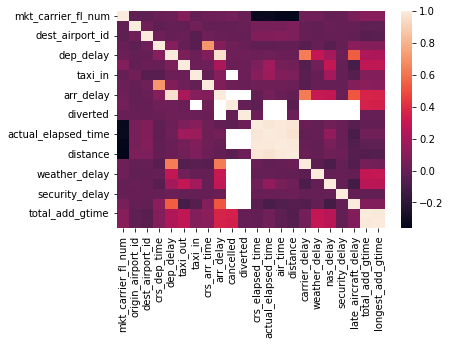

In [27]:
sns.heatmap(flightssample.corr())

In [12]:
flightssample['month'] = pd.DatetimeIndex(flightssample['fl_date']).month
flightssample['year'] = pd.DatetimeIndex(flightssample['fl_date']).year
flightssample['day'] = pd.DatetimeIndex(flightssample['fl_date']).day

<AxesSubplot:>

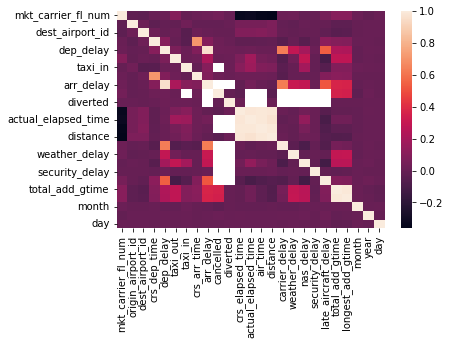

In [29]:
sns.heatmap(flightssample.corr())

In [14]:
df = flightssample.rename(columns=lambda x: x.strip())

In [16]:
flightssample.to_csv('data/flightdata.csv')

In [15]:
df = df.drop(['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num', 'tail_num', 
'origin_city_name', 'dest_city_name', 'cancelled', 'cancellation_code', 
'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'year', 'day', ], axis=1)

<AxesSubplot:>

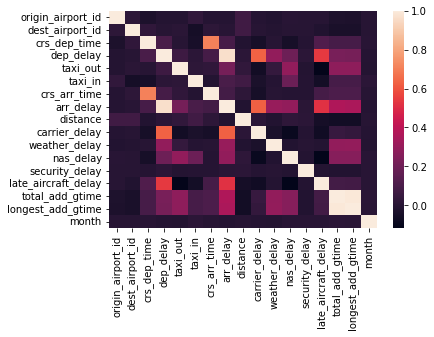

In [48]:
sns.heatmap(df.corr())